In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

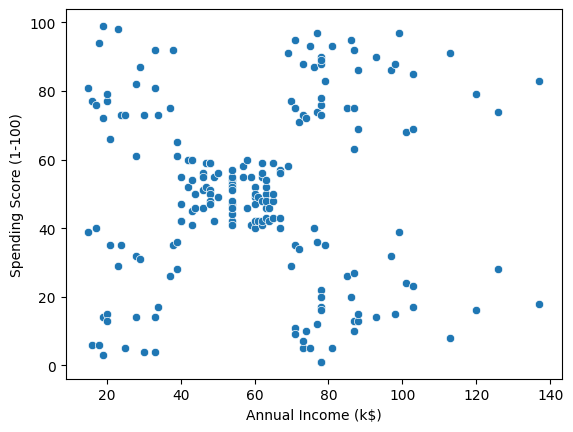

In [5]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)')

In [6]:
x = data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [7]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

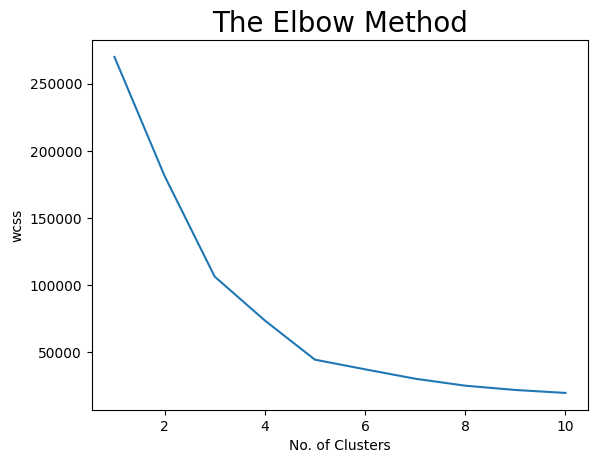

In [8]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
km = KMeans(
    n_clusters=5,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

y_means = km.fit_predict(x)

In [10]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

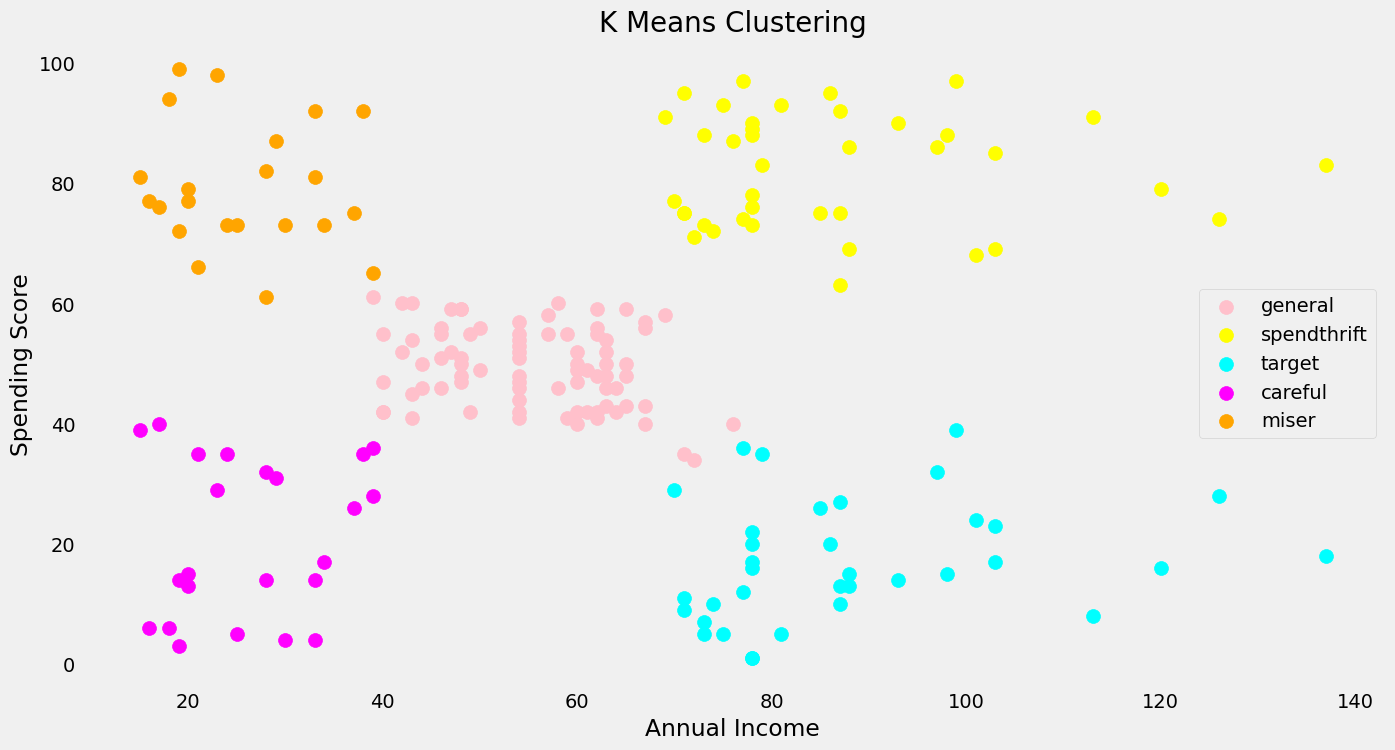

In [19]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1], s=100, c='pink',label='general')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1], s=100, c='yellow',label='spendthrift')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1], s=100, c='cyan',label='target')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1], s=100, c='magenta',label='careful')
plt.scatter(x[y_means == 4,0],x[y_means == 4,1], s=100, c='orange',label='miser')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [28]:
score = silhouette_score(x, km.labels_,metric='euclidean')
f"Silhoutte Score: %.3f" % score             

'Silhoutte Score: 0.554'

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

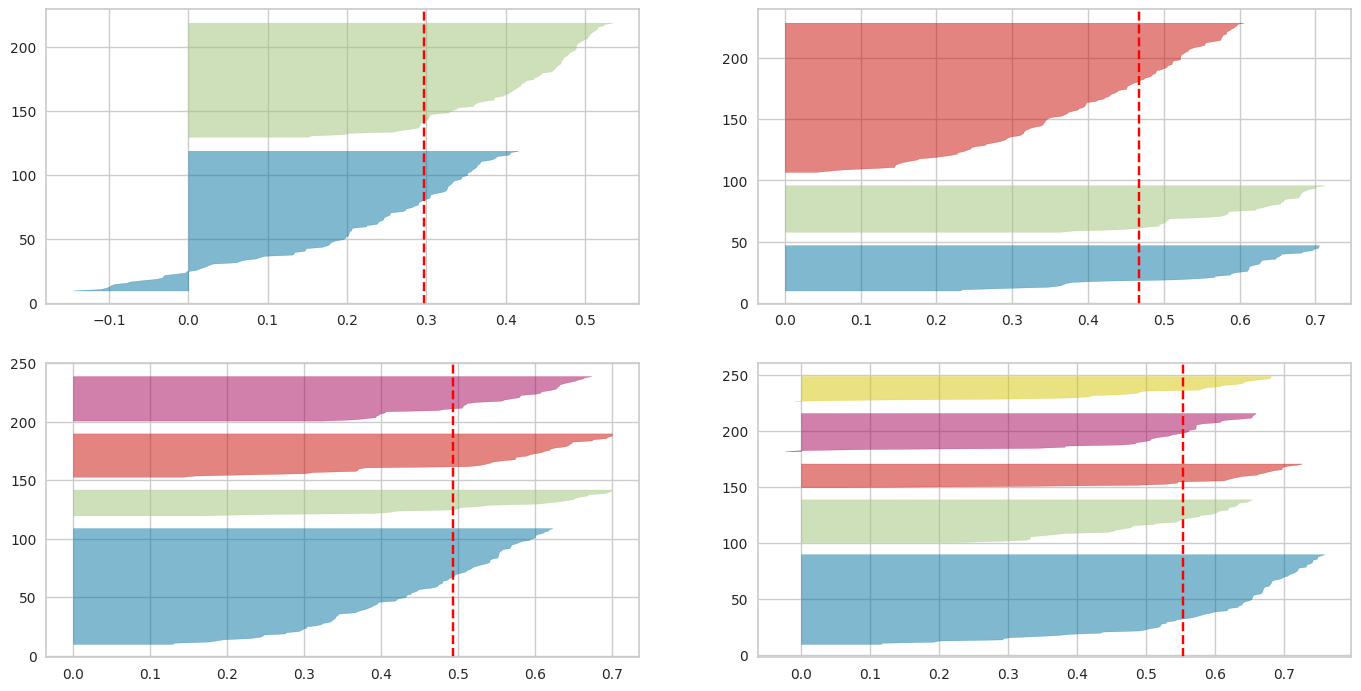

In [31]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i,2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

In [32]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
a = data.loc[:,['Age', 'Annual Income (k$)','Spending Score (1-100)']].values
print(a.shape)

(200, 3)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

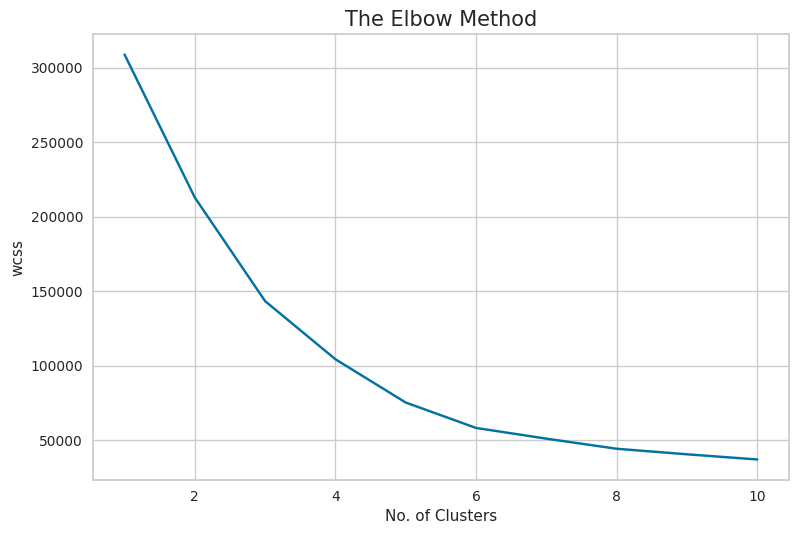

In [36]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(a)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)    
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
km = KMeans(n_clusters=6, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = km.fit_predict(a)

In [39]:
y_means =pd.DataFrame(y_means)

In [41]:
df = pd.concat([data,y_means],axis=1)

In [44]:
df.rename(columns={0:'Clusters'},inplace=True)